# Converting seurat objects to scanpy

In [50]:
DIR="/vast/scratch/users/mueller.h/hackathon"
#source("/Users/harrisonm/data/WEHI/Conferences/OZSC_Hackathon/scripts/st_python/r/utils.R")
#source("/Users/harrisonm/data/WEHI/Conferences/OZSC_Hackathon/scripts/st_python/r/transfer.R")

# Load libraries

In [51]:
library(Seurat)

### load RDS

In [121]:
atac <- readRDS(file.path(DIR, "data", "qc", "processed_unpaired_ATAC.RDS"))
rna <- readRDS(file.path(DIR, "data", "qc", "processed_Annotated_unpaired_RNA.RDS"))

In [136]:
rna@meta.data["modality"] = "rna"
atac@meta.data["modality"] = "atac"

rna@meta.data["clusters"] = rna@meta.data["seurat_clusters"]
rna@meta.data["cell_type"] = rna@meta.data["Celltype"]

atac@meta.data["clusters"] = atac@meta.data["ATAC_snn_res.0.5"]
atac@meta.data["cell_type"] = "Unknown"

rna$modality = "rna"
atac$modality = "atac"

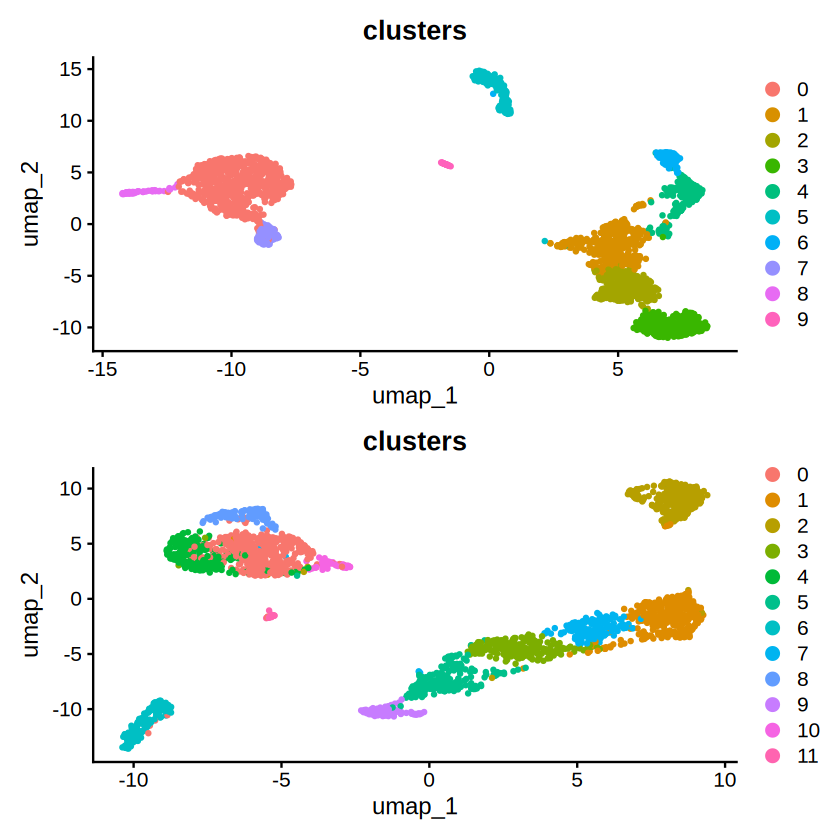

In [132]:
DimPlot(rna, group.by = "clusters") / DimPlot(atac, group.by = "clusters")

In [174]:
#shared_genes <- intersect(rownames(rna), rownames(atac))
#shared_genes
#seurat_rna <- subset(seurat_rna, features = shared_genes)
#seurat_atac <- subset(seurat_atac, features = shared_genes)

combined <- merge(rna, y = atac)
combined

Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


An object of class Seurat 
193167 features across 5093 samples within 2 assays 
Active assay: RNA (36601 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: ATAC

In [175]:
cols_to_keep = c("modality", "clusters", "cell_type")
meta = rbind(rna@meta.data[,cols_to_keep], atac@meta.data[,cols_to_keep])
head(meta)

,modality,clusters,cell_type
,<chr>,<fct>,<chr>
AAACAGCCAAATATCC-1,rna,6,NK cells
AAACAGCCAGGAACTG-1,rna,0,Monocytes
AAACAGCCAGGCTTCG-1,rna,0,Monocytes
AAACCAACACCTGCTC-1,rna,5,B cells
AAACCAACAGATTCAT-1,rna,4,T cells
AAACCAACAGTTGCGT-1,rna,2,CD4+ T cells


In [176]:
pca_mat <- Embeddings(rna, "pca")[, 1:20]
lsi_mat <- Embeddings(atac, "lsi")[, 2:21]  # skip LSI 1, which often reflects sequencing depth

embed <- rbind(pca_mat, lsi_mat)
head(embed)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20
AAACAGCCAAATATCC-1,8.580443,-4.160596,-15.538376,-15.468583,12.130099,0.6755310,-4.1490236,0.4767180,2.0913336,-5.0209922,4.8830071,1.8923778,-0.775623310,0.5147158,0.2183088,1.3122838,-1.1091343,-2.5056487,3.5797958,-1.1999502
AAACAGCCAGGAACTG-1,-17.130967,2.068117,-1.352230,-3.107783,-6.425426,-4.5057583,-2.8389076,-2.8547406,1.2926486,-1.1823351,-1.6354807,1.2684124,1.254506919,5.1897274,-2.8959249,0.3902635,-2.0483504,-0.3212725,-0.0190626,0.2272689
AAACAGCCAGGCTTCG-1,-19.819319,-2.613212,3.480622,4.955077,8.588627,1.7209091,0.8720928,2.2515918,-0.1383927,0.6817977,-1.0311053,-0.9400093,-0.073356871,-4.2637105,-0.9876673,-0.5647223,-0.8763640,0.2245276,0.1493009,0.5542551
AAACCAACACCTGCTC-1,6.377243,15.154342,6.683339,-4.742295,3.045329,-0.5700354,-1.6772153,0.2713507,6.3247608,3.1030492,-0.6541923,-1.9563096,-0.008638781,1.8650211,1.0157896,1.1634820,4.3081989,1.0693332,4.7417050,6.8164065
AAACCAACAGATTCAT-1,9.681480,-4.715767,-8.959457,-9.333708,7.045692,0.1900932,-1.6885692,-1.9841203,-1.2596142,1.1874742,-1.8257149,-1.3798337,2.720772526,1.2089035,2.0033412,-0.1287002,0.3865120,-1.1080431,2.7153246,-0.1268106
AAACCAACAGTTGCGT-1,9.993097,-2.626500,1.884136,1.896700,-1.762768,1.1456350,-1.7314018,0.4796268,-0.8640752,-0.5532302,1.3133298,-2.2142012,0.831420427,-0.4108829,0.2103582,-0.3044289,-0.1174866,1.4890207,-1.2643199,0.4618238


In [177]:
new_embed = HarmonyMatrix(embed, meta, "modality", do_pca = F, verbose = F)

Warning message in HarmonyMatrix(embed, meta, "modality", do_pca = F, verbose = F):
“HarmonyMatrix is deprecated and will be removed in the future from the API in the future”


In [178]:
new_names = paste0(rownames(new_embed), meta$modality)
rownames(new_embed)= new_names
rownames(meta) = new_names

In [186]:
seurat_obj <- CreateSeuratObject(counts = t(new_embed), data = t(new_embed), project = "MyProject", meta.data = meta)


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [187]:
seurat_obj[["embed"]] = CreateDimReducObject(
  embeddings = new_embed,
  key = "CUSTOM_",
  assay = "RNA"  # or "GeneActivity", depending on context
)

In [188]:
seurat_obj <- RunUMAP(seurat_obj, features = 1:20)

15:58:14 UMAP embedding parameters a = 0.9922 b = 1.112

15:58:14 Read 5093 rows and found 20 numeric columns

15:58:14 Using Annoy for neighbor search, n_neighbors = 30

15:58:14 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*


*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:58:15 Writing NN index file to temp file /tmp/RtmpEmCGgh/file39591335734c6

15:58:15 Searching Annoy index using 1 thread, search_k = 3000

15:58:17 Annoy recall = 100%

15:58:18 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:58:19 Initializing from normalized Laplacian + noise (using RSpectra)

15:58:20 Commencing optimization for 500 epochs, with 213244 positive edges

15:58:20 Using rng type: pcg

15:58:27 Optimization finished



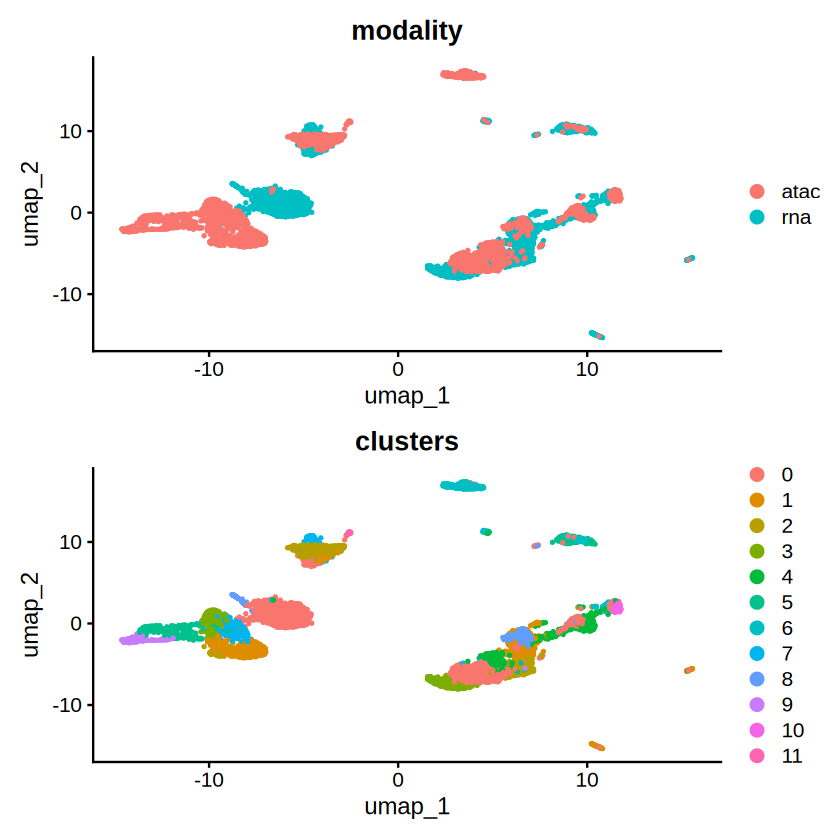

In [190]:
DimPlot(seurat_obj, group.by = "modality") / DimPlot(seurat_obj, group.by = "clusters")

In [ ]:

# Add custom DimReduc
custom_dr <- CreateDimReducObject(embeddings = combined_embed,
                                   key = "CUSTOM_",
                                   assay = "RNA")
integration_obj[["custom"]] <- custom_dr

In [27]:
rna <- NormalizeData(rna)
rna <- FindVariableFeatures(rna)

atac <- NormalizeData(atac)
atac <- FindVariableFeatures(atac)

Normalizing layer: counts

Finding variable features for layer counts



In [28]:
object.list <- list(rna = rna, atac = atac)

In [30]:
is.list(object.list)
all(sapply(object.list, inherits, "Seurat"))

[1] TRUE

[1] TRUE

In [31]:
# need to run FindVariableFeaturesaa
features <- FindIntegrationAnchors(object.list = object.list)

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


Computing 2000 integration features



ERROR: Error in sort.int(x, na.last = na.last, decreasing = decreasing, ...): 'x' must be atomic


In [40]:
Assays(atac, "ATAC")

ChromatinAssay data with 156607 features for 2563 cells
Variable features: 2000 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

In [48]:
ifnb <- IntegrateLayers(object = multi, method = CCAIntegration, orig.reduction = "pca",
    new.reduction = "integrated.cca", verbose = FALSE)

ERROR: [1m[33mError[39m in `IntegrateLayers()`:[22m
[33m![39m 'assay' must be a v5 or SCT assay


In [46]:
layers(combined)

ERROR: Error in layers(combined): could not find function "layers"


In [44]:
combined <- rna
combined[["ATAC"]] <- atac[["ATAC"]]  # or "GeneActivity"


In [47]:
combined

An object of class Seurat 
193208 features across 2563 samples within 2 assays 
Active assay: RNA (36601 features, 2000 variable features)
 2 layers present: counts, data
 1 other assay present: ATAC

## Harmony test

In [97]:
library(harmony)

In [90]:
data(cell_lines)
V <- cell_lines$scaled_pcs # dimension reduction (2370 x 20)
meta_data <- cell_lines$meta_data # dataframe (2370 x 5)

In [117]:
meta_data

cell_id,dataset,nGene,percent_mito,cell_type
<chr>,<chr>,<int>,<dbl>,<chr>
half_GTACGAACCACCAA,half,1508,0.01477707,jurkat
t293_AGGTCATGCACTTT,t293,4009,0.02321219,t293
half_ATAGTTGACTTCTA,half,3545,0.01526671,jurkat
half_GAGCGGCTTGCTTT,half,2450,0.01703195,jurkat
jurkat_CTGATACTCCGTAA,jurkat,2388,0.06014961,jurkat
half_GTGGAGGACTGTTT,half,3762,0.02112796,t293
half_CTGGAAACAACTGC,half,3792,0.02267832,jurkat
t293_TGGATTCTTCTACT,t293,4089,0.03451416,t293
half_GGATTTCTTCCAGA,half,3374,0.02279202,t293


In [100]:
harmony_embeddings <- harmony::HarmonyMatrix(
    V, meta_data, 'dataset', do_pca = FALSE, verbose=FALSE
)

Warning message in harmony::HarmonyMatrix(V, meta_data, "dataset", do_pca = FALSE, :
“HarmonyMatrix is deprecated and will be removed in the future from the API in the future”
Warning message:
“Warning: The parameters do_pca and npcs are deprecated. They will be ignored for this function call and please remove parameters do_pca and npcs and pass to harmony cell_embeddings directly.
This warning is displayed once per session.”


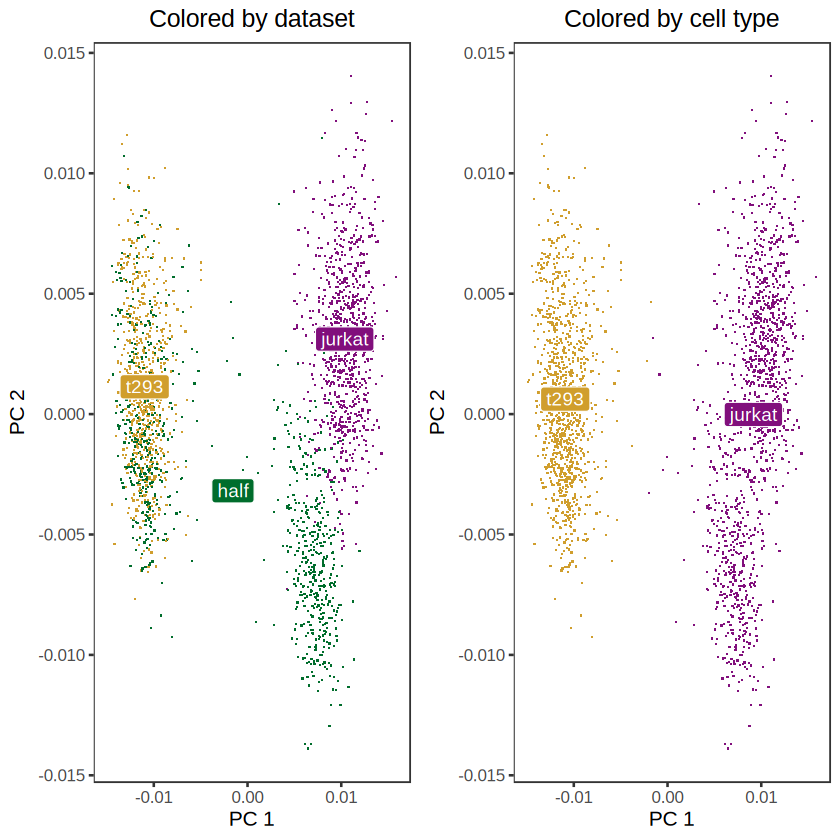

In [114]:
do_scatter <- function(xy, meta_data, label_name, base_size = 12) {    
    palette_use <- c(`jurkat` = '#810F7C', `t293` = '#D09E2D',`half` = '#006D2C')
    xy <- xy[, 1:2]
    colnames(xy) <- c('X1', 'X2')
    plt_df <- xy %>% data.frame() %>% cbind(meta_data)
    plt <- ggplot(plt_df, aes(X1, X2, col = !!rlang::sym(label_name), fill = !!rlang::sym(label_name))) + 
        theme_test(base_size = base_size) +
        guides(color = guide_legend(override.aes = list(stroke = 1, alpha = 1,
                                                        shape = 16, size = 4))) +
        scale_color_manual(values = palette_use) +
        scale_fill_manual(values = palette_use) +
        theme(plot.title = element_text(hjust = .5)) +
        labs(x = "PC 1", y = "PC 2") +
        theme(legend.position = "none") +
        geom_point(shape = '.')
    
    ## Add labels
    data_labels <- plt_df %>%
        dplyr::group_by(!!rlang::sym(label_name)) %>%
        dplyr::summarise(X1 = mean(X1), X2 = mean(X2)) %>%
        dplyr::ungroup()
    plt + geom_label(data = data_labels, aes(label = !!rlang::sym(label_name)), 
                            color = "white", size = 4)
}
p1 <- do_scatter(V, meta_data, 'dataset') + 
    labs(title = 'Colored by dataset')
p2 <- do_scatter(V, meta_data, 'cell_type') + 
    labs(title = 'Colored by cell type')

cowplot::plot_grid(p1, p2)

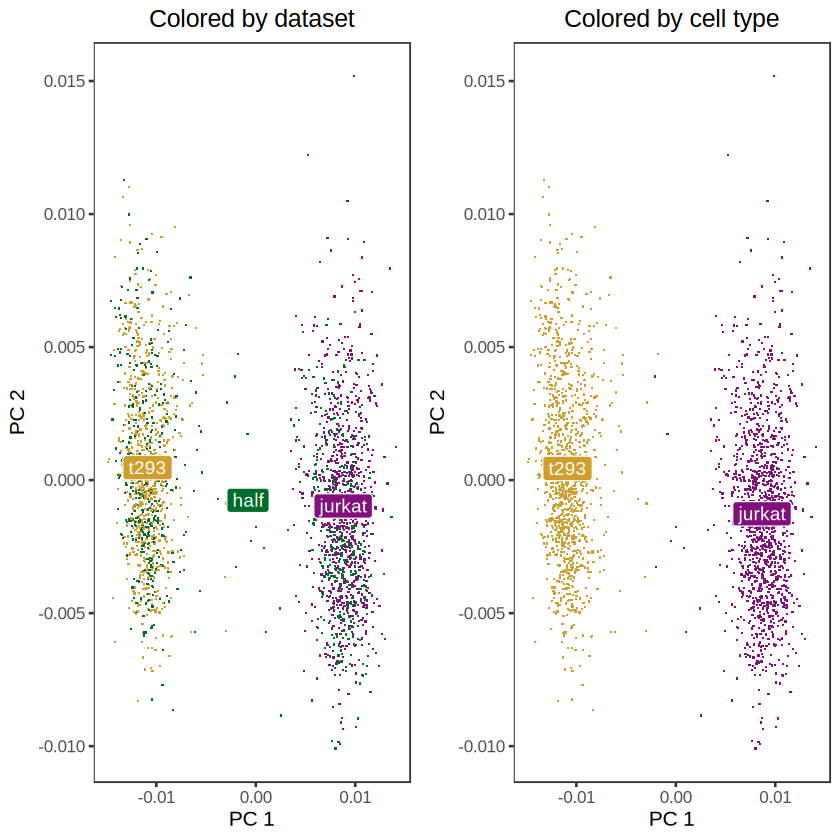

In [116]:

p1 <- do_scatter(harmony_embeddings, meta_data, 'dataset') + 
    labs(title = 'Colored by dataset')
p2 <- do_scatter(harmony_embeddings, meta_data, 'cell_type') + 
    labs(title = 'Colored by cell type')

cowplot::plot_grid(p1, p2)